In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df_modelling = pd.read_csv('data/loan_encode.csv')

In [3]:
df_modelling.head()

,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,"loan_amnt_(465.5, 3950.0]","loan_amnt_(3950.0, 7400.0]","loan_amnt_(7400.0, 10850.0]","loan_amnt_(10850.0, 14300.0]","loan_amnt_(14300.0, 17750.0]","loan_amnt_(17750.0, 21200.0]","loan_amnt_(21200.0, 24650.0]","loan_amnt_(24650.0, 28100.0]","loan_amnt_(28100.0, 31550.0]","loan_amnt_(31550.0, 35000.0]","int_rate_(5.399, 7.484]","int_rate_(7.484, 9.548]","int_rate_(9.548, 11.612]","int_rate_(11.612, 13.676]","int_rate_(13.676, 15.74]","int_rate_(15.74, 17.804]","int_rate_(17.804, 19.868]","int_rate_(19.868, 21.932]","int_rate_(21.932, 23.996]","int_rate_(23.996, 26.06]","dti_(-0.04, 3.999]","dti_(3.999, 7.998]","dti_(7.998, 11.997]","dti_(11.997, 15.996]","dti_(15.996, 19.995]","dti_(19.995, 23.994]","dti_(23.994, 27.993]","dti_(27.993, 31.992]","dti_(31.992, 35.991]","dti_(35.991, 39.99]","open_acc_(-0.084, 8.4]","open_acc_(8.4, 16.8]","open_acc_(16.8, 25.2]","open_acc_(25.2, 33.6]","open_acc_(33.6, 42.0]","open_acc_(42.0, 50.4]","open_acc_(50.4, 58.8]","open_acc_(58.8, 67.2]","open_acc_(67.2, 75.6]","open_acc_(75.6, 84.0]","total_acc_(0.845, 23.143]","total_acc_(23.143, 45.286]","total_acc_(45.286, 67.429]","total_acc_(67.429, 89.571]","total_acc_(89.571, 111.714]","total_acc_(111.714, 133.857]","total_acc_(133.857, 156.0]","total_pymnt_(-57.778, 5777.758]","total_pymnt_(5777.758, 11555.516]","total_pymnt_(11555.516, 17333.274]","total_pymnt_(17333.274, 23111.032]","total_pymnt_(23111.032, 28888.79]","total_pymnt_(28888.79, 34666.548]","total_pymnt_(34666.548, 40444.306]","total_pymnt_(40444.306, 46222.064]","total_pymnt_(46222.064, 51999.822]","total_pymnt_(51999.822, 57777.58]","credit_pull_year_(0.954, 5.6]","credit_pull_year_(5.6, 10.2]","credit_pull_year_(10.2, 14.8]","credit_pull_year_(14.8, 19.4]","credit_pull_year_(19.4, 24.0]","credit_pull_year_(24.0, 28.6]","credit_pull_year_(28.6, 33.2]","credit_pull_year_(33.2, 37.8]","credit_pull_year_(37.8, 42.4]","credit_pull_year_(42.4, 47.0]","revol_bal_(0, 5000)","revol_bal_(5000, 10000)","revol_bal_(10000, 15000)",revol_bal_(> 15000),"revol_util_(0, 20)","revol_util_(20, 40)","revol_util_(40, 60)","revol_util_(60, 80)",revol_util_(> 80),"last_pymnt_amnt_(0,500)","last_pymnt_amnt_(500, 1000)","last_pymnt_amnt_(1000, 1500)","last_pymnt_amnt_(1500, 3500)",last_pymnt_amnt_(> 3500),"pymnt_time_(0, 1)","pymnt_time_(1, 6)","pymnt_time_(6, 12)",pymnt_time_(> 12),annual_inc_(low income),annual_inc_(mid income),annual_inc_(high income),term,initial_list_status,loan_status
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1
1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0

In [4]:
# Split Dataset
from sklearn.model_selection import train_test_split
# Balance data train using SMOTE
from imblearn.over_sampling import SMOTE
# logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report, roc_auc_score, roc_curve, auc, confusion_matrix
# Hyperparameter
from sklearn.model_selection import RandomizedSearchCV
#Confusion Matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


In [5]:
X = df_modelling.drop(['loan_status'], axis=1)
y = df_modelling['loan_status']

In [6]:
y.value_counts()

1    412111
0     54174
Name: loan_status, dtype: int64

In [7]:
#Split Dataset 80% Train : 30% Test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=24)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((373028, 115), (93257, 115), (373028,), (93257,))

In [8]:
# Handle Imbalance Target Using SMOTE
sm = SMOTE(random_state=24)
sm.fit(X_train, y_train)
X_smote, y_smote = sm.fit_resample(X_train, y_train)
X_smote.shape, X_train.shape, y_smote.shape, y_train.shape

((659460, 115), (373028, 115), (659460,), (373028,))

### Train Model
#### Logistic Regression

In [9]:
logreg = LogisticRegression(random_state = 24) 
logreg.fit(X_smote, y_smote)

y_pred_proba_train = logreg.predict_proba(X_train)[:][:,1]
y_pred_proba_test = logreg.predict_proba(X_test)[:][:,1]

print('AUC Train Proba :', roc_auc_score(y_train, y_pred_proba_train))
print('AUC Test Proba :', roc_auc_score(y_test, y_pred_proba_test))

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC Train Proba : 0.9347361357516379
AUC Test Proba : 0.9362768405086176


In [10]:
y_pred_class = []

for i in y_pred_proba_test:
    if i > 0.5:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.87      0.67      0.75     10876
           1       0.96      0.99      0.97     82381

    accuracy                           0.95     93257
   macro avg       0.91      0.83      0.86     93257
weighted avg       0.95      0.95      0.95     93257



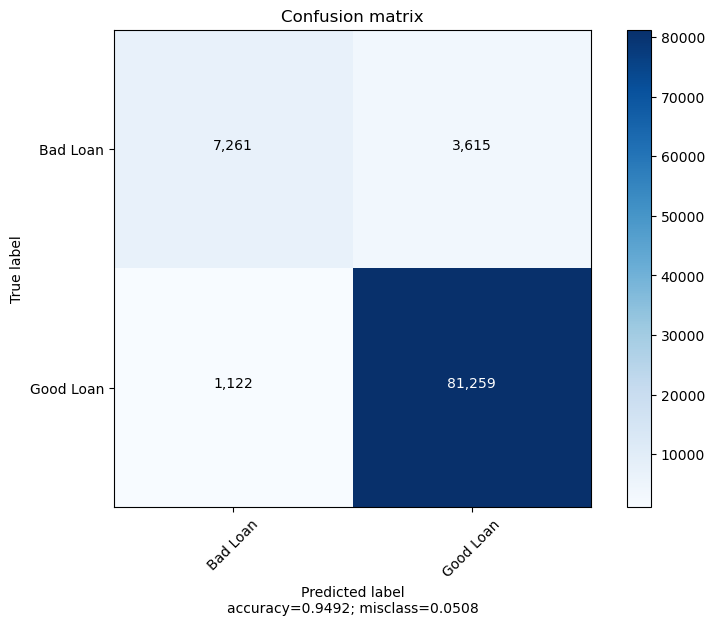

In [11]:
cm = confusion_matrix(y_test, y_pred_class)
target_names = ['Bad Loan','Good Loan']

plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

#### Hyperparameter Tuning

In [12]:
param = {
    'penalty' : ['none', 'l2', 'l1', 'elasticnet'],
    'C' : [float(x) for x in np.linspace(start=0, stop=1, num=75)]
     }

logreg = LogisticRegression()

# search
logreg_clf = RandomizedSearchCV(logreg,
                            param,
                            scoring='roc_auc',
                            cv=5,
                            random_state = 24) 

search_logreg = logreg_clf.fit(X_smote,y_smote)
# best hyperparameters
search_logreg.best_params_

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

{'penalty': 'l2', 'C': 0.08108108108108109}

In [13]:
best_params = search_logreg.best_params_
logreg_tuning = LogisticRegression(**best_params)
logreg_tuning.fit(X_smote,y_smote)
y_train_pred_proba = logreg_tuning.predict_proba(X_train)[:][:,1]
y_test_pred_lr_proba = logreg_tuning.predict_proba(X_test)[:][:,1]

print('AUC Train Proba :', roc_auc_score(y_train, y_train_pred_proba))
print('AUC Test Proba :', roc_auc_score(y_test, y_test_pred_lr_proba))

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC Train Proba : 0.9350674199221115
AUC Test Proba : 0.9366345432677087


In [14]:
y_pred_class_2 = []

for i in y_test_pred_lr_proba:
    if i > 0.5:
        y_pred_class_2.append(1)
    else:
        y_pred_class_2.append(0)

print(classification_report(y_test, y_pred_class_2))

              precision    recall  f1-score   support

           0       0.86      0.66      0.75     10876
           1       0.96      0.99      0.97     82381

    accuracy                           0.95     93257
   macro avg       0.91      0.82      0.86     93257
weighted avg       0.95      0.95      0.95     93257



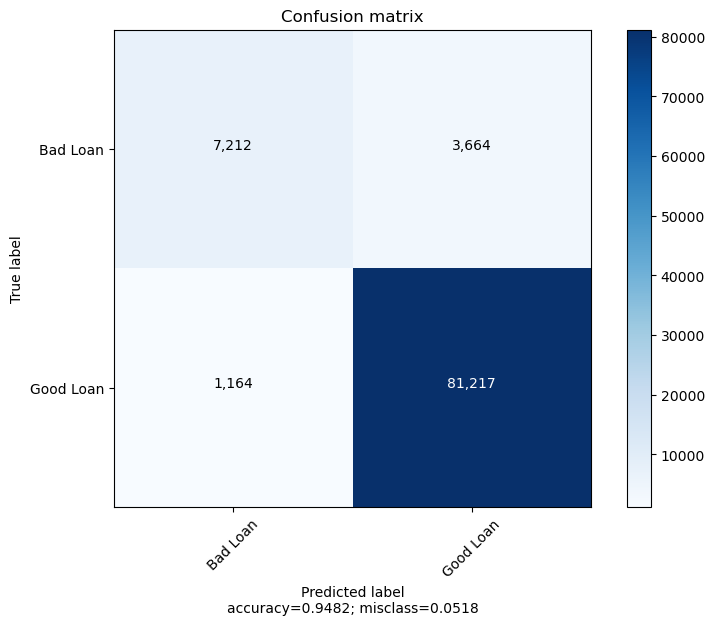

In [15]:
cm = confusion_matrix(y_test, y_pred_class_2)
target_names = ['Bad Loan','Good Loan']

plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

In [16]:
import statsmodels.api as sm
X2 = sm.add_constant(X_smote)
est = sm.Logit(y_smote, X2)
est2 = est.fit(method='bfgs')
print(est2.summary())

         Current function value: 0.184076
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


C:\Users\ACER\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               659460
Model:                          Logit   Df Residuals:                   659344
Method:                           MLE   Df Model:                          115
Date:                Mon, 01 Jan 2024   Pseudo R-squ.:                  0.7344
Time:                        18:25:47   Log-Likelihood:            -1.2139e+05
converged:                      False   LL-Null:                   -4.5710e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                -10.8894      0.061   -177.616      0.000     -11.010     -10.769
home_ownership_MORTGAGE                0.4358      0.027   

In [30]:
# Converting statsmodels summary object to Pandas Dataframe,
df_importance = pd.read_html(est2.summary().tables[1].as_html(),header=0,index_col=0)[0]

# find odds_ratio
for i in df_importance['coef']:
    if i == 0 :
        df_importance['odds_ratio'] = 0
    else:
        df_importance['odds_ratio'] = np.exp(df_importance['coef'])
        
# show probability contribution
df_importance[df_importance['P>|z|'] <= 0.05].sort_values('odds_ratio',ascending = False)


,coef,std err,z,P>|z|,[0.025,0.975],odds_ratio
last_pymnt_amnt_(> 3500),7.6863,0.185,41.508,0.000,7.323,8.049,2178.299924
"loan_amnt_(465.5, 3950.0]",5.6972,0.039,145.381,0.000,5.620,5.774,298.031743
"pymnt_time_(0, 1)",5.2394,0.031,167.329,0.000,5.178,5.301,188.556934
"last_pymnt_amnt_(1500, 3500)",4.0516,0.089,45.379,0.000,3.877,4.227,57.489366
"loan_amnt_(3950.0, 7400.0]",3.6153,0.033,110.578,0.000,3.551,3.679,37.162493
"pymnt_time_(1, 6)",3.2545,0.030,109.261,0.000,3.196,3.313,25.906658
"int_rate_(5.399, 7.484]",2.8248,0.066,42.537,0.000,2.695,2.955,16.857573
"dti_(3.999, 7.998]",2.7827,0.031,89.569,0.000,2.722,2.844,16.162601
"total_pymnt_(23111.032, 28888.79]",2.7582,0.048,57.311,0.000,2.664,2.853,15.771429
"loan_amnt_(7400.0, 10850.0]",2.7124,0.030,90.330,0.000,2.654,2.771,15.065389


#### ROC Curve

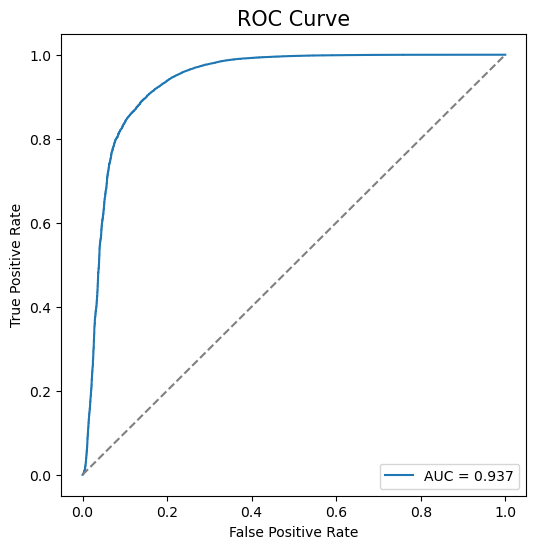

In [31]:
fpr, tpr, tr = roc_curve(y_test, y_test_pred_lr_proba)
auc = roc_auc_score(y_test, y_test_pred_lr_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='AUC = %0.3f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='grey')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve', fontsize=15)
plt.legend()

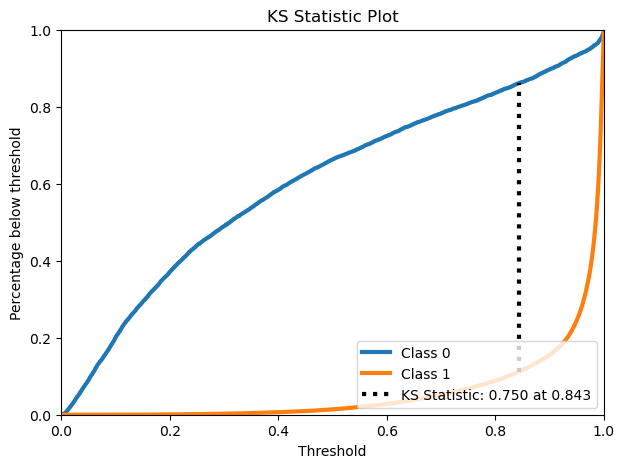

In [32]:
import scikitplot as skplt
y_pred_proba = logreg_tuning.predict_proba(X_test)

skplt.metrics.plot_ks_statistic(y_test, y_pred_proba, figsize=(7,5));


### Scorecard

In [33]:
# Set new index
df_importance = df_importance.reset_index()

# Rename columns
df_importance = df_importance.rename(columns = {'index' : 'feature'})

# Create new columns feature_name 
df_importance['feature_name'] = df_importance['feature'].str.split('_').str[:-1]
df_importance['feature_name'] = df_importance['feature_name'].str.join('_')
df_importance.at[0,'feature_name']='intercept'
df_importance.at[114,'feature_name']='term'
df_importance.at[115,'feature_name']='initial_list_status'

df_importance

,feature,coef,std err,z,P>|z|,[0.025,0.975],odds_ratio,feature_name
0,const,-10.8894,0.061,-177.616000,0.000,-11.010,-10.769,0.000019,intercept
1,home_ownership_MORTGAGE,0.4358,0.027,15.908000,0.000,0.382,0.490,1.546200,home_ownership
2,home_ownership_OTHER,-0.0294,0.226,-0.130000,0.896,-0.472,0.413,0.971028,home_ownership
3,home_ownership_OWN,1.5098,0.035,43.526000,0.000,1.442,1.578,4.525826,home_ownership
4,home_ownership_RENT,0.5924,0.027,21.687000,0.000,0.539,0.646,1.808323,home_ownership
5,purpose_car,1.2053,0.066,18.301000,0.000,1.076,1.334,3.337760,purpose
6,purpose_credit_card,0.7925,0.026,30.363000,0.000,0.741,0.844,2.208912,purpose_credit
7,purpose_debt_consolidation,0.6218,0.023,26.808000,0.000,0.576,0.667,1.862277,purpose_debt
8,purpose_educational,-0.0034,0.149,-0.023000,0.982,-0.295,0.288,0.996606,purpose
9,purpose_home_improvement,1.5416,0.037,42.158000,0.000,1.470,1.613,4.672060,purpose_home


In [34]:
# copy dataset
df_scorecard = df_importance.copy()

# define max and min score
min_score = 300
max_score = 850

In [35]:
# aggregate min and sum
min_sum_coef = df_scorecard.groupby('feature_name')['coef'].min().sum()

# aggregate max and sum
max_sum_coef = df_scorecard.groupby('feature_name')['coef'].max().sum()

# define credit score
df_scorecard['Score_Calculation'] = df_scorecard['coef'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)

# adjust intercept values
df_scorecard['Score_Calculation'][0] = ((df_scorecard['coef'][0] - min_sum_coef) / ((max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score)

# round credit score
df_scorecard['Score_Final'] = df_scorecard['Score_Calculation'].round()

C:\Users\ACER\AppData\Local\Temp\ipykernel_22664\1996122741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score_Calculation'][0] = ((df_scorecard['coef'][0] - min_sum_coef) / ((max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score)


In [36]:
# check min score (300) & max score (850)
min_sum_score_prel = df_scorecard.groupby('feature_name')['Score_Final'].min().sum()
max_sum_score_prel = df_scorecard.groupby('feature_name')['Score_Final'].max().sum()

print('min score', min_sum_score_prel)
print('max score', max_sum_score_prel)

min score 302.0
max score 850.0


In [37]:
df_scorecard.sort_values('Score_Final',ascending = False).head(10)

,feature,coef,std err,z,P>|z|,[0.025,0.975],odds_ratio,feature_name,Score_Calculation,Score_Final
0,const,-10.8894,0.061,-177.616,0.0,-11.010,-10.769,0.000019,intercept,266.569357,267.0
106,last_pymnt_amnt_(> 3500),7.6863,0.185,41.508,0.0,7.323,8.049,2178.299924,last_pymnt_amnt,93.742641,94.0
26,"loan_amnt_(465.5, 3950.0]",5.6972,0.039,145.381,0.0,5.620,5.774,298.031743,loan_amnt,69.483441,69.0
107,"pymnt_time_(0, 1)",5.2394,0.031,167.329,0.0,5.178,5.301,188.556934,pymnt_time,63.900081,64.0
105,"last_pymnt_amnt_(1500, 3500)",4.0516,0.089,45.379,0.0,3.877,4.227,57.489366,last_pymnt_amnt,49.413591,49.0
27,"loan_amnt_(3950.0, 7400.0]",3.6153,0.033,110.578,0.0,3.551,3.679,37.162493,loan_amnt,44.092446,44.0
108,"pymnt_time_(1, 6)",3.2545,0.030,109.261,0.0,3.196,3.313,25.906658,pymnt_time,39.692105,40.0
47,"dti_(3.999, 7.998]",2.7827,0.031,89.569,0.0,2.722,2.844,16.162601,dti,33.938000,34.0
77,"total_pymnt_(23111.032, 28888.79]",2.7582,0.048,57.311,0.0,2.664,2.853,15.771429,total_pymnt,33.639196,34.0
36,"int_rate_(5.399, 7.484]",2.8248,0.066,42.537,0.0,2.695,2.955,16.857573,int_rate,34.451454,34.0


Text(0.5, 1.0, 'Top 10 High Score Features')

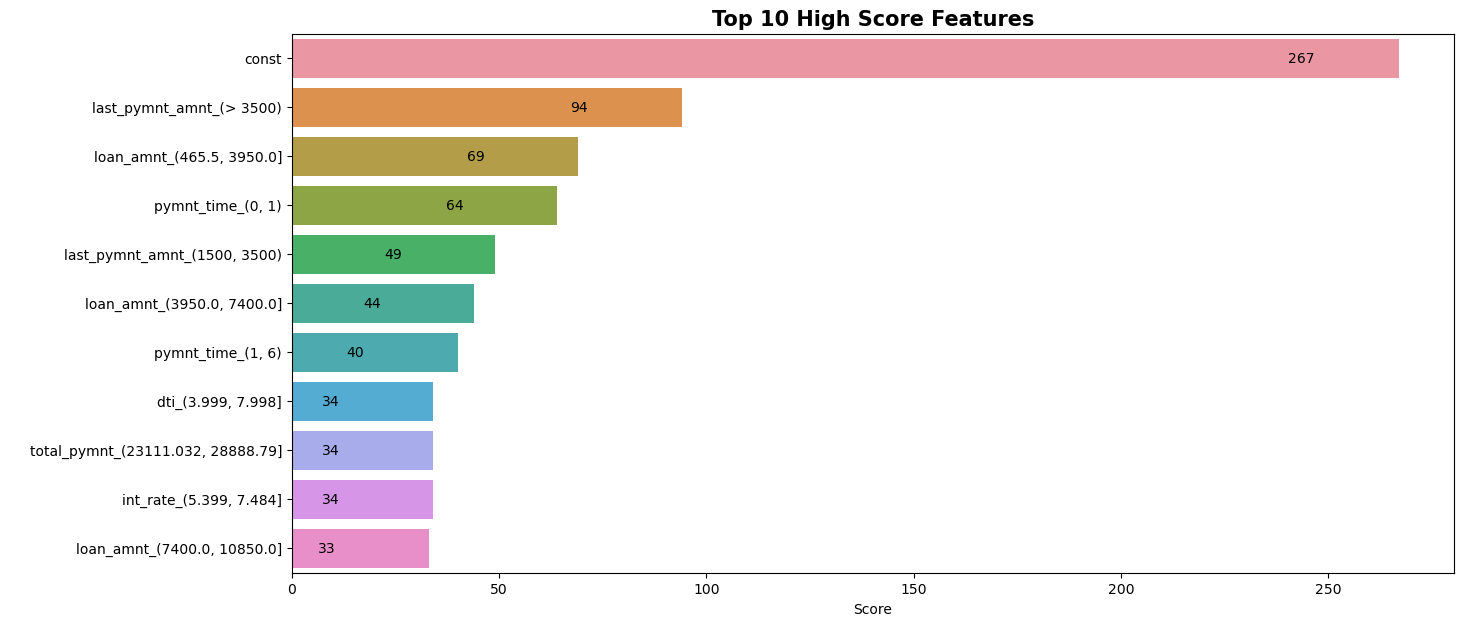

In [38]:
high_score= df_scorecard.sort_values('Score_Final',ascending = False).head(11)
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x='Score_Final', y='feature', data=high_score)
plt.bar_label(ax.containers[0], padding=-80)
plt.ylabel(' ')
plt.xlabel('Score')
plt.title('Top 10 High Score Features', fontsize=15, weight='extra bold')

Text(0.5, 1.0, 'Top 10 Low Score Features')

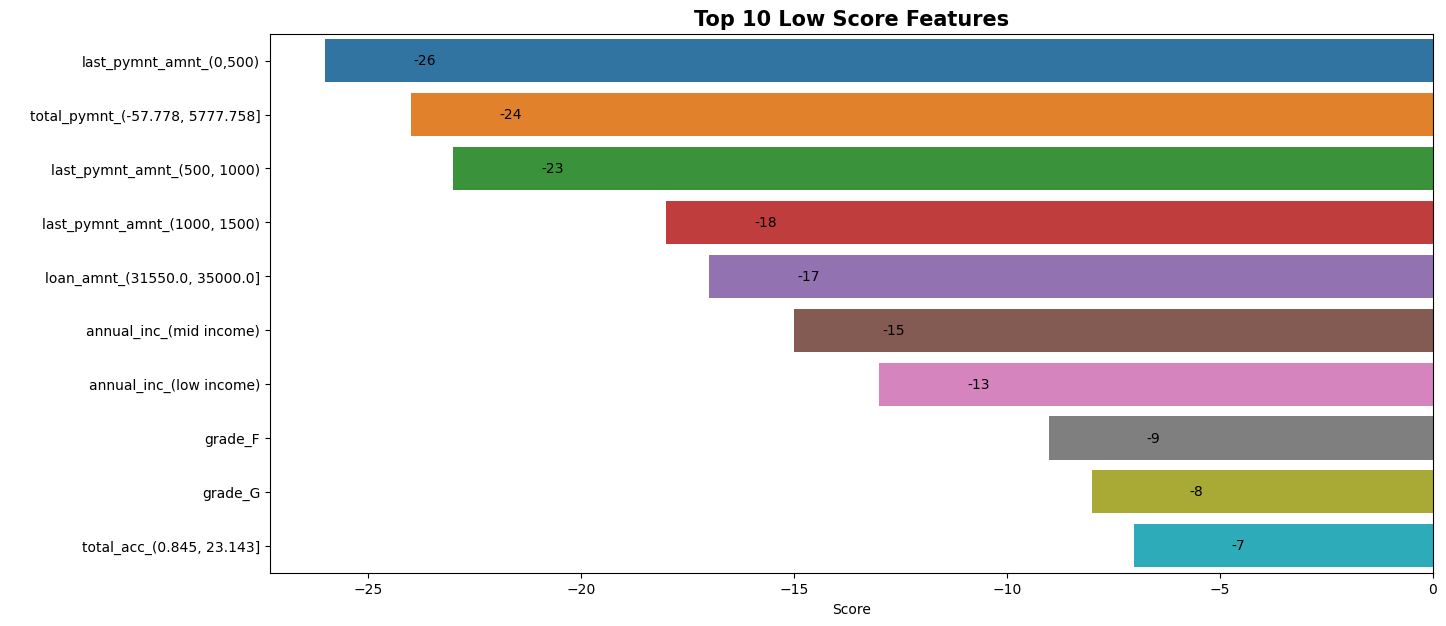

In [39]:
low_score= df_scorecard.sort_values('Score_Final',ascending = True).head(10)
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x='Score_Final', y='feature', data=low_score)
plt.bar_label(ax.containers[0], padding=-80)
plt.ylabel(' ')
plt.xlabel('Score')
plt.title('Top 10 Low Score Features', fontsize=15, weight='extra bold')

In [40]:
# define data
data_fico = df_modelling[X_smote.columns]
df_score = data_fico.copy()
df_score.head()

,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,"loan_amnt_(465.5, 3950.0]","loan_amnt_(3950.0, 7400.0]","loan_amnt_(7400.0, 10850.0]","loan_amnt_(10850.0, 14300.0]","loan_amnt_(14300.0, 17750.0]","loan_amnt_(17750.0, 21200.0]","loan_amnt_(21200.0, 24650.0]","loan_amnt_(24650.0, 28100.0]","loan_amnt_(28100.0, 31550.0]","loan_amnt_(31550.0, 35000.0]","int_rate_(5.399, 7.484]","int_rate_(7.484, 9.548]","int_rate_(9.548, 11.612]","int_rate_(11.612, 13.676]","int_rate_(13.676, 15.74]","int_rate_(15.74, 17.804]","int_rate_(17.804, 19.868]","int_rate_(19.868, 21.932]","int_rate_(21.932, 23.996]","int_rate_(23.996, 26.06]","dti_(-0.04, 3.999]","dti_(3.999, 7.998]","dti_(7.998, 11.997]","dti_(11.997, 15.996]","dti_(15.996, 19.995]","dti_(19.995, 23.994]","dti_(23.994, 27.993]","dti_(27.993, 31.992]","dti_(31.992, 35.991]","dti_(35.991, 39.99]","open_acc_(-0.084, 8.4]","open_acc_(8.4, 16.8]","open_acc_(16.8, 25.2]","open_acc_(25.2, 33.6]","open_acc_(33.6, 42.0]","open_acc_(42.0, 50.4]","open_acc_(50.4, 58.8]","open_acc_(58.8, 67.2]","open_acc_(67.2, 75.6]","open_acc_(75.6, 84.0]","total_acc_(0.845, 23.143]","total_acc_(23.143, 45.286]","total_acc_(45.286, 67.429]","total_acc_(67.429, 89.571]","total_acc_(89.571, 111.714]","total_acc_(111.714, 133.857]","total_acc_(133.857, 156.0]","total_pymnt_(-57.778, 5777.758]","total_pymnt_(5777.758, 11555.516]","total_pymnt_(11555.516, 17333.274]","total_pymnt_(17333.274, 23111.032]","total_pymnt_(23111.032, 28888.79]","total_pymnt_(28888.79, 34666.548]","total_pymnt_(34666.548, 40444.306]","total_pymnt_(40444.306, 46222.064]","total_pymnt_(46222.064, 51999.822]","total_pymnt_(51999.822, 57777.58]","credit_pull_year_(0.954, 5.6]","credit_pull_year_(5.6, 10.2]","credit_pull_year_(10.2, 14.8]","credit_pull_year_(14.8, 19.4]","credit_pull_year_(19.4, 24.0]","credit_pull_year_(24.0, 28.6]","credit_pull_year_(28.6, 33.2]","credit_pull_year_(33.2, 37.8]","credit_pull_year_(37.8, 42.4]","credit_pull_year_(42.4, 47.0]","revol_bal_(0, 5000)","revol_bal_(5000, 10000)","revol_bal_(10000, 15000)",revol_bal_(> 15000),"revol_util_(0, 20)","revol_util_(20, 40)","revol_util_(40, 60)","revol_util_(60, 80)",revol_util_(> 80),"last_pymnt_amnt_(0,500)","last_pymnt_amnt_(500, 1000)","last_pymnt_amnt_(1000, 1500)","last_pymnt_amnt_(1500, 3500)",last_pymnt_amnt_(> 3500),"pymnt_time_(0, 1)","pymnt_time_(1, 6)","pymnt_time_(6, 12)",pymnt_time_(> 12),annual_inc_(low income),annual_inc_(mid income),annual_inc_(high income),term,initial_list_status
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0

In [41]:
df_score.insert(0, 'Intercept', 1)
scorecard_scores = df_scorecard['Score_Final']
# reshape
scorecard_scores = scorecard_scores.values.reshape(116, 1)
# Calculate Score with matrix multiplication
y_scores = df_score.dot(scorecard_scores)
# Concat
score_card_df = pd.concat([df_score, y_scores], axis=1)
# Rename
score_card_df.rename(columns={0:'Credit Score'}, inplace=True)

In [43]:
# show
score_card_df.head(5)

,Intercept,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,"loan_amnt_(465.5, 3950.0]","loan_amnt_(3950.0, 7400.0]","loan_amnt_(7400.0, 10850.0]","loan_amnt_(10850.0, 14300.0]","loan_amnt_(14300.0, 17750.0]","loan_amnt_(17750.0, 21200.0]","loan_amnt_(21200.0, 24650.0]","loan_amnt_(24650.0, 28100.0]","loan_amnt_(28100.0, 31550.0]","loan_amnt_(31550.0, 35000.0]","int_rate_(5.399, 7.484]","int_rate_(7.484, 9.548]","int_rate_(9.548, 11.612]","int_rate_(11.612, 13.676]","int_rate_(13.676, 15.74]","int_rate_(15.74, 17.804]","int_rate_(17.804, 19.868]","int_rate_(19.868, 21.932]","int_rate_(21.932, 23.996]","int_rate_(23.996, 26.06]","dti_(-0.04, 3.999]","dti_(3.999, 7.998]","dti_(7.998, 11.997]","dti_(11.997, 15.996]","dti_(15.996, 19.995]","dti_(19.995, 23.994]","dti_(23.994, 27.993]","dti_(27.993, 31.992]","dti_(31.992, 35.991]","dti_(35.991, 39.99]","open_acc_(-0.084, 8.4]","open_acc_(8.4, 16.8]","open_acc_(16.8, 25.2]","open_acc_(25.2, 33.6]","open_acc_(33.6, 42.0]","open_acc_(42.0, 50.4]","open_acc_(50.4, 58.8]","open_acc_(58.8, 67.2]","open_acc_(67.2, 75.6]","open_acc_(75.6, 84.0]","total_acc_(0.845, 23.143]","total_acc_(23.143, 45.286]","total_acc_(45.286, 67.429]","total_acc_(67.429, 89.571]","total_acc_(89.571, 111.714]","total_acc_(111.714, 133.857]","total_acc_(133.857, 156.0]","total_pymnt_(-57.778, 5777.758]","total_pymnt_(5777.758, 11555.516]","total_pymnt_(11555.516, 17333.274]","total_pymnt_(17333.274, 23111.032]","total_pymnt_(23111.032, 28888.79]","total_pymnt_(28888.79, 34666.548]","total_pymnt_(34666.548, 40444.306]","total_pymnt_(40444.306, 46222.064]","total_pymnt_(46222.064, 51999.822]","total_pymnt_(51999.822, 57777.58]","credit_pull_year_(0.954, 5.6]","credit_pull_year_(5.6, 10.2]","credit_pull_year_(10.2, 14.8]","credit_pull_year_(14.8, 19.4]","credit_pull_year_(19.4, 24.0]","credit_pull_year_(24.0, 28.6]","credit_pull_year_(28.6, 33.2]","credit_pull_year_(33.2, 37.8]","credit_pull_year_(37.8, 42.4]","credit_pull_year_(42.4, 47.0]","revol_bal_(0, 5000)","revol_bal_(5000, 10000)","revol_bal_(10000, 15000)",revol_bal_(> 15000),"revol_util_(0, 20)","revol_util_(20, 40)","revol_util_(40, 60)","revol_util_(60, 80)",revol_util_(> 80),"last_pymnt_amnt_(0,500)","last_pymnt_amnt_(500, 1000)","last_pymnt_amnt_(1000, 1500)","last_pymnt_amnt_(1500, 3500)",last_pymnt_amnt_(> 3500),"pymnt_time_(0, 1)","pymnt_time_(1, 6)","pymnt_time_(6, 12)",pymnt_time_(> 12),annual_inc_(low income),annual_inc_(mid income),annual_inc_(high income),term,initial_list_status,Credit Score
0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,421.0
1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,410.0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,395.0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,409.0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,

In [47]:
df = pd.read_csv('data/loan_data_2007_2014.csv')

C:\Users\ACER\AppData\Local\Temp\ipykernel_22664\3859966382.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/loan_data_2007_2014.csv')


In [48]:
# Merge Score To Original Dataframe with id
df_id = df[['id','member_id']].copy()
credit_score_w_id = pd.merge(df_id, score_card_df, left_index = True, right_index = True)

In [49]:
credit_score_w_id.head()

,id,member_id,Intercept,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,"loan_amnt_(465.5, 3950.0]","loan_amnt_(3950.0, 7400.0]","loan_amnt_(7400.0, 10850.0]","loan_amnt_(10850.0, 14300.0]","loan_amnt_(14300.0, 17750.0]","loan_amnt_(17750.0, 21200.0]","loan_amnt_(21200.0, 24650.0]","loan_amnt_(24650.0, 28100.0]","loan_amnt_(28100.0, 31550.0]","loan_amnt_(31550.0, 35000.0]","int_rate_(5.399, 7.484]","int_rate_(7.484, 9.548]","int_rate_(9.548, 11.612]","int_rate_(11.612, 13.676]","int_rate_(13.676, 15.74]","int_rate_(15.74, 17.804]","int_rate_(17.804, 19.868]","int_rate_(19.868, 21.932]","int_rate_(21.932, 23.996]","int_rate_(23.996, 26.06]","dti_(-0.04, 3.999]","dti_(3.999, 7.998]","dti_(7.998, 11.997]","dti_(11.997, 15.996]","dti_(15.996, 19.995]","dti_(19.995, 23.994]","dti_(23.994, 27.993]","dti_(27.993, 31.992]","dti_(31.992, 35.991]","dti_(35.991, 39.99]","open_acc_(-0.084, 8.4]","open_acc_(8.4, 16.8]","open_acc_(16.8, 25.2]","open_acc_(25.2, 33.6]","open_acc_(33.6, 42.0]","open_acc_(42.0, 50.4]","open_acc_(50.4, 58.8]","open_acc_(58.8, 67.2]","open_acc_(67.2, 75.6]","open_acc_(75.6, 84.0]","total_acc_(0.845, 23.143]","total_acc_(23.143, 45.286]","total_acc_(45.286, 67.429]","total_acc_(67.429, 89.571]","total_acc_(89.571, 111.714]","total_acc_(111.714, 133.857]","total_acc_(133.857, 156.0]","total_pymnt_(-57.778, 5777.758]","total_pymnt_(5777.758, 11555.516]","total_pymnt_(11555.516, 17333.274]","total_pymnt_(17333.274, 23111.032]","total_pymnt_(23111.032, 28888.79]","total_pymnt_(28888.79, 34666.548]","total_pymnt_(34666.548, 40444.306]","total_pymnt_(40444.306, 46222.064]","total_pymnt_(46222.064, 51999.822]","total_pymnt_(51999.822, 57777.58]","credit_pull_year_(0.954, 5.6]","credit_pull_year_(5.6, 10.2]","credit_pull_year_(10.2, 14.8]","credit_pull_year_(14.8, 19.4]","credit_pull_year_(19.4, 24.0]","credit_pull_year_(24.0, 28.6]","credit_pull_year_(28.6, 33.2]","credit_pull_year_(33.2, 37.8]","credit_pull_year_(37.8, 42.4]","credit_pull_year_(42.4, 47.0]","revol_bal_(0, 5000)","revol_bal_(5000, 10000)","revol_bal_(10000, 15000)",revol_bal_(> 15000),"revol_util_(0, 20)","revol_util_(20, 40)","revol_util_(40, 60)","revol_util_(60, 80)",revol_util_(> 80),"last_pymnt_amnt_(0,500)","last_pymnt_amnt_(500, 1000)","last_pymnt_amnt_(1000, 1500)","last_pymnt_amnt_(1500, 3500)",last_pymnt_amnt_(> 3500),"pymnt_time_(0, 1)","pymnt_time_(1, 6)","pymnt_time_(6, 12)",pymnt_time_(> 12),annual_inc_(low income),annual_inc_(mid income),annual_inc_(high income),term,initial_list_status,Credit Score
0,1077501,1296599,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,421.0
1,1077430,1314167,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,410.0
2,1077175,1313524,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,395.0
3,1076863,1277178,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,409.0
4,1075358,1311748,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0

In [50]:
result_credit_score = credit_score_w_id[['id','member_id','Credit Score']]

In [51]:
result_credit_score.sample(10)

,id,member_id,Credit Score
228935,1065178,1299038,521.0
460304,10574765,12456901,509.0
87710,7377750,9039765,466.0
60715,8987315,10769291,455.0
76535,7955660,9677755,475.0
219558,1250238,1492675,511.0
381299,17423051,19545586,426.0
234828,36491269,39223077,435.0
141352,4797256,6039543,476.0
329128,23903878,26276760,422.0


In [53]:
# Save clean data to csv
path_file = 'data/loan_result.csv'
result_credit_score.to_csv(path_file, index=False)